In [1]:
# Linear regression from scratch

In [2]:
from statistics import mean

In [35]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [36]:
xs = [1,2,3,4,5]
ys = [5,4,6,5,6]

xs= np.array(xs)
ys =np.array(ys)

In [37]:
xs

array([1, 2, 3, 4, 5])

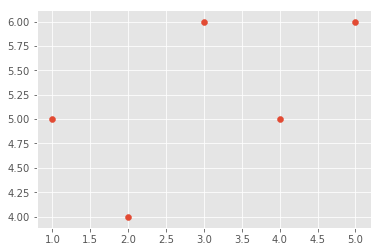

In [38]:
plt.scatter(xs,ys)

In [39]:
def best_fit_slope_intercept(xs,ys):
    m=(mean(xs)*mean(ys)-mean(xs*ys))/((mean(xs)**2)-mean(xs**2))
    b= mean(ys)-m*mean(xs)
    return m,b

In [40]:
m,b=best_fit_slope_intercept(xs,ys)

In [41]:
m,b

(0.5, 3.5)

In [42]:
regression_line = [m*x+b for x in xs]

In [43]:
regression_line

[4.0, 4.5, 5.0, 5.5, 6.0]

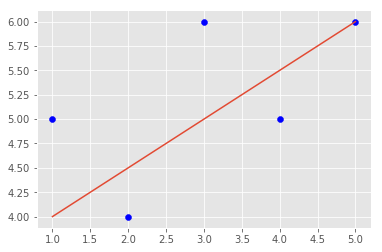

In [46]:
plt.scatter(xs,ys,c='b')
plt.plot(xs,regression_line)

In [47]:
#lets predict something

predict_x = 7
predict_y = m*predict_x+b


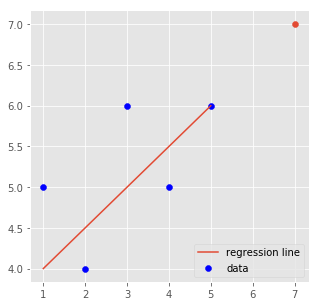

In [55]:
plt.figure(figsize=[5,5])
plt.scatter(xs,ys,c='b',label='data')
plt.plot(xs,regression_line,label='regression line')
plt.scatter(predict_x,predict_y)
plt.legend(loc=4)
plt.show()

In [79]:
def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

In [80]:
r_squared= cof_of_determination(ys,regression_line)
print(r_squared)

0.166666666667


In [63]:
[mean(ys) for y in ys]

[5, 5, 5, 5, 5]

In [64]:
ys

array([5, 4, 6, 5, 6])

In [71]:
 np.square(ys)-np.square(regression_line)

array([  9.  ,  -4.25,  11.  ,  -5.25,   0.  ])

In [69]:
 sum((regression_line-ys) * (regression_line-ys))

2.5

In [81]:
import random

In [115]:
def create_dataset(hm, variance, step=.5, correlation=False):
    val=1
    ys=[]
    for i in range(hm):
        y=val+random.randrange(-variance,variance)
        ys.append(y)
        
        if correlation and correlation=='pos':
            val+=step
        elif correlation and correlation=='neg':
            val-=step
    xs = [i for i in range(len(ys))]
    return ys, xs
 

In [116]:
ys,xs = create_dataset(20,5,correlation='pos')

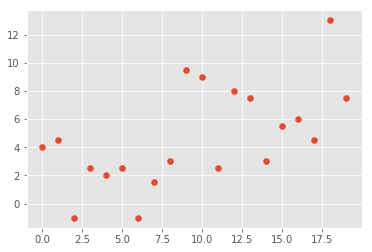

In [118]:
plt.scatter(xs,ys)

In [ ]:
#let's put it all together

17840.3953096
42765.1
0.582828163396


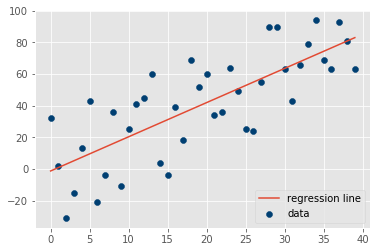

In [124]:
from statistics import mean
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


def create_dataset(hm,variance,step=2,correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step

    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64),np.array(ys,dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)

    return m, b


def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]

    squared_error_regr = sum((ys_line - ys_orig) * (ys_line - ys_orig))
    squared_error_y_mean = sum((y_mean_line - ys_orig) * (y_mean_line - ys_orig))

    print(squared_error_regr)
    print(squared_error_y_mean)

    r_squared = 1 - (squared_error_regr/squared_error_y_mean)

    return r_squared

#keep changing the variance will change R value, lower the variace better R value
xs, ys = create_dataset(40,40,2,correlation='pos')
m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]
r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)

plt.scatter(xs,ys,color='#003F72', label = 'data')
plt.plot(xs, regression_line, label = 'regression line')
plt.legend(loc=4)
plt.show()

In [ ]:
#Less variance should result in higher r-squared/coefficient of determination, 
#higher variance = lower r squared.